In [2]:
#Importando 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import wordcloud
import json
import geopandas as gpd
import shapefile as shp
import sys

import lightgbm as lgb
from lightgbm import LGBMClassifier

import matplotlib as mpl
from matplotlib import pyplot as plt

from datetime import date
from scipy import stats
from scipy.stats import norm, skew 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

from collections import Counter

from xgboost import XGBClassifier

In [5]:
df = pd.read_csv('datasets/startup data.csv')

In [7]:
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [9]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [112]:
dataset=pd.read_csv("datasets/Startups.csv")
dataset.head()

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [113]:
dataset.columns

Index(['Company', 'Valuation', 'Valuation_date', 'Industry', 'Country'], dtype='object')

In [116]:
dataset[['Valuation','Valuation_date','Country']].head()

,Valuation,Valuation_date,Country
0,140.0,April-21,China
1,100.0,October-21,United States
2,95.0,March-21,United States / Ireland
3,45.6,June-21,Sweden
4,40.0,September-21,Australia


In [117]:
describeNum = dataset.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Valuation,250.000000,7.820840,13.465775,2.100000,3.000000,4.025000,7.400000,140.000000


In [10]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


In [11]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


In [12]:
df['status'] = df.status.map({'acquired':1, 'closed':0})
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,0
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,1
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,1
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,1
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,1


In [13]:
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

In [14]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
labels,923.000000,0.646804,0.478222,0.000000,0.000000,1.000000,1.000000,1.000000
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000


In [15]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)


,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


In [16]:
cats = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status'] 
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom state_code:
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code, dtype: int64

Value count kolom zip_code:
94107             30
94105             23
95054             20
94103             19
94043             18
94025             16
94041             16
94110             15
10011             14
10003             13
94301             13
98104             12
78701             12
94306             11
1803              11
94111             11
94404             11
94104             11
10013             11
10010             10
10001             10
2451              10
94085             10
94403              9
94040              9
94063              9
10016         

In [17]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [18]:
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


In [19]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [20]:
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Kolom "Unnamed: 6": ', totalNull)

Total Missing Values Kolom "Unnamed: 6":  0


In [21]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [22]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Kolom "closed_at": ', totalNull)

Total Missing Values Kolom "closed_at":  0


In [23]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [24]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

In [25]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [26]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [27]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


In [28]:
df.corr()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.360434,0.206049,0.040176,0.328260,0.077217,0.059996,0.081735,-0.045309,-0.169067,0.012429,-0.000873,0.007312,0.073772,0.044355,-0.025893,-0.072193,0.000104,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652,1.000000
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.040176,0.046350,0.116371,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176
milestones,-0.000338,0.017708,-0.016420,0.328260,-0.295894,-0.122905,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,0.017559,-0.032863,-0.123909,-0.156038,0.175672,0.127427,0.083657,0.064852,0.071892,0.004819,-0.181104,0.006833,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260


In [29]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

(32.5, -0.5)

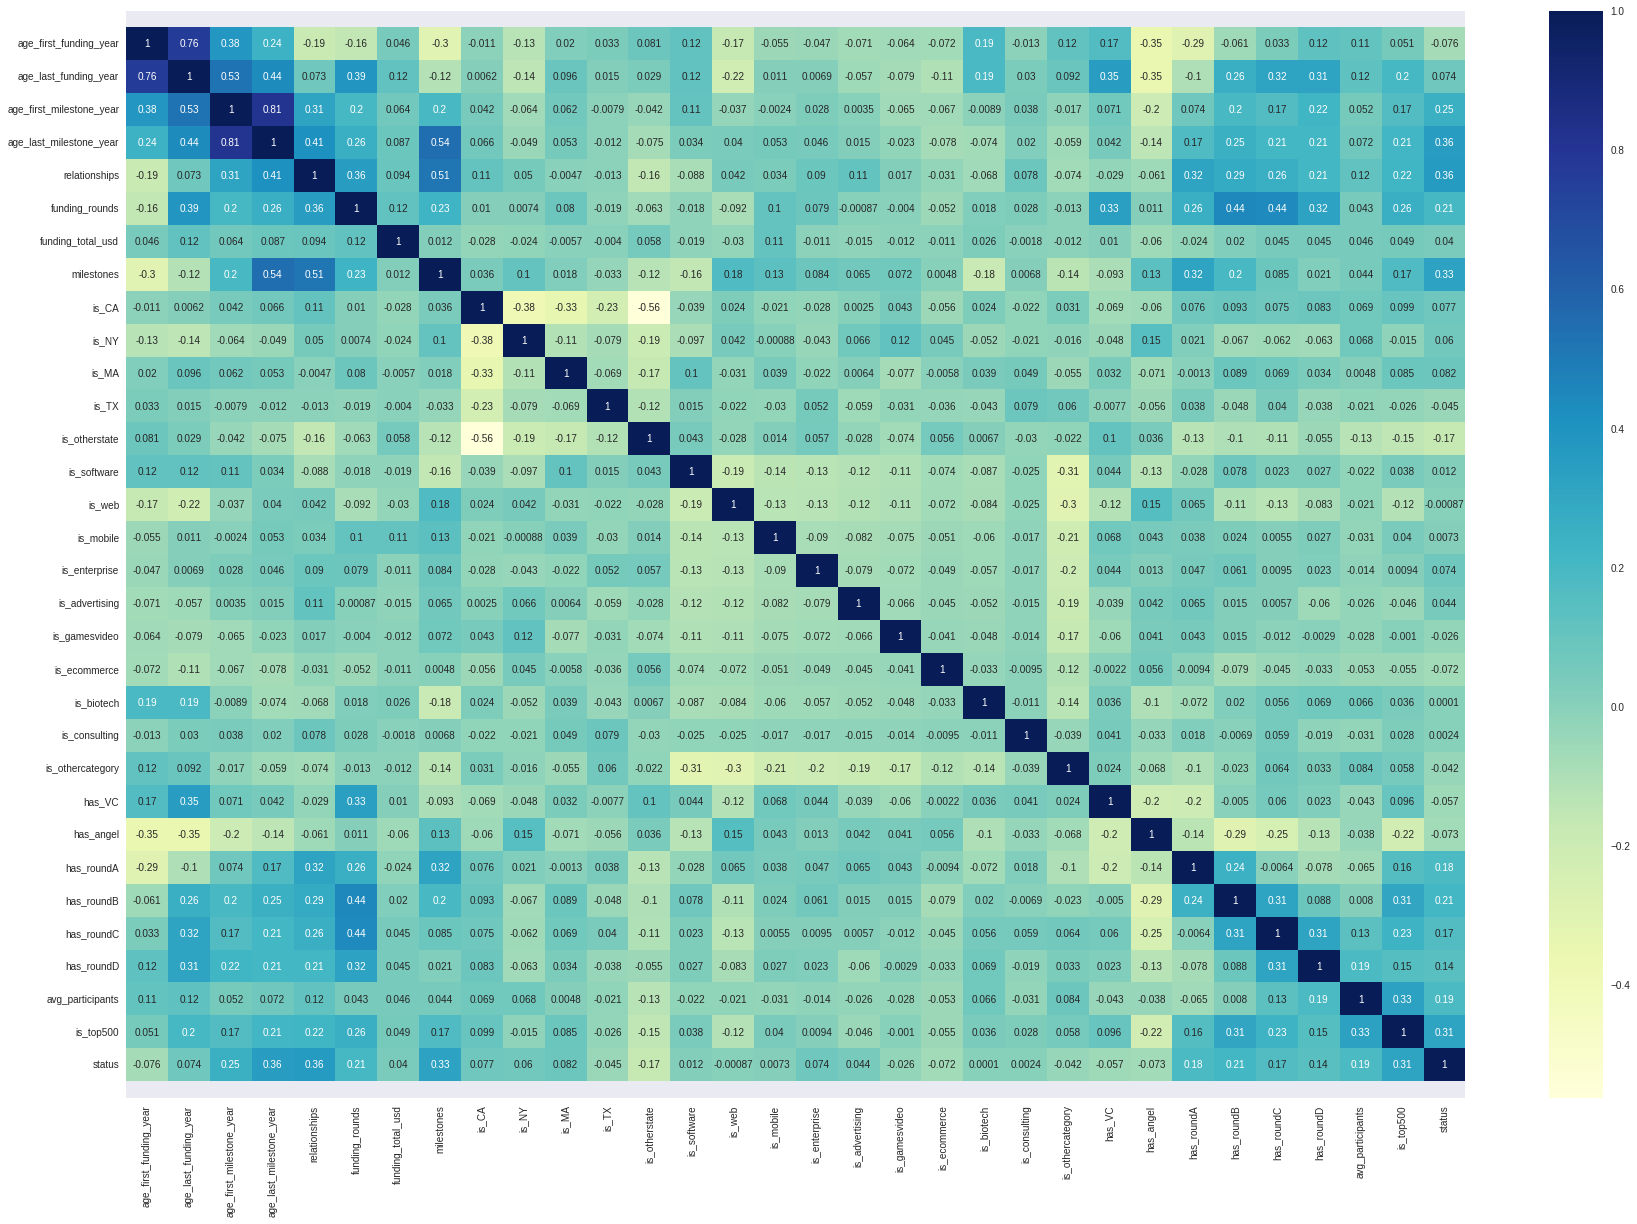

In [30]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

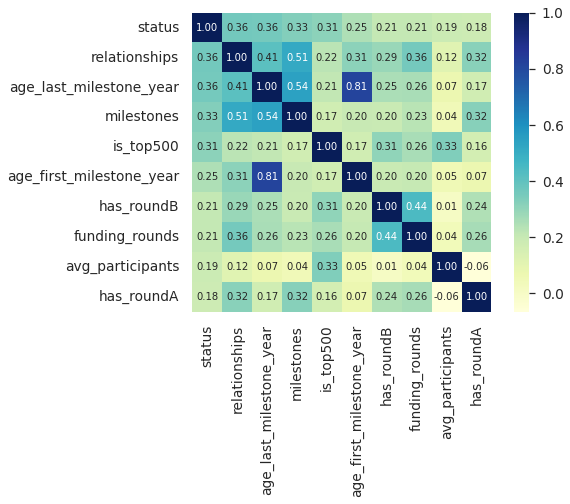

In [31]:
cols = df[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

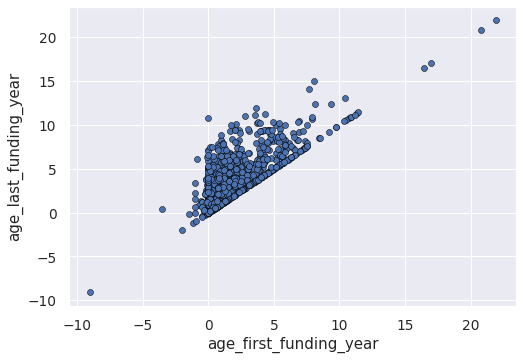

In [32]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

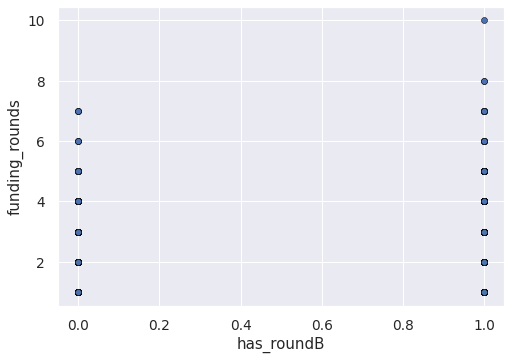

In [33]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['has_roundB'], y=df['funding_rounds'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="has_roundB", ylabel="funding_rounds")

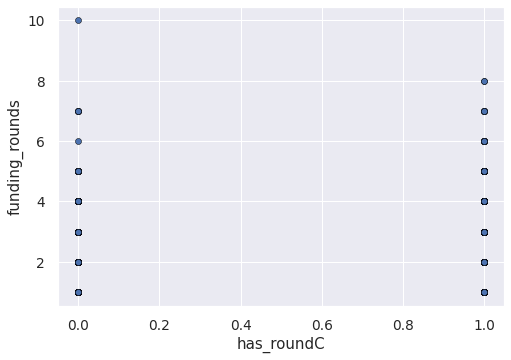

In [34]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['has_roundC'], y=df['funding_rounds'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="has_roundC", ylabel="funding_rounds")

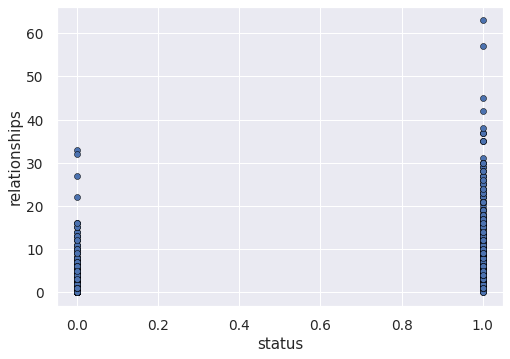

In [35]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['status'], y=df['relationships'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="relationships")

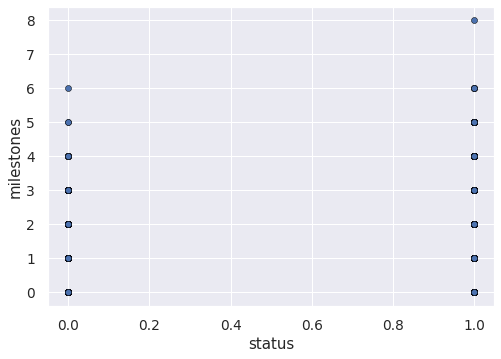

In [36]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['status'], y=df['milestones'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

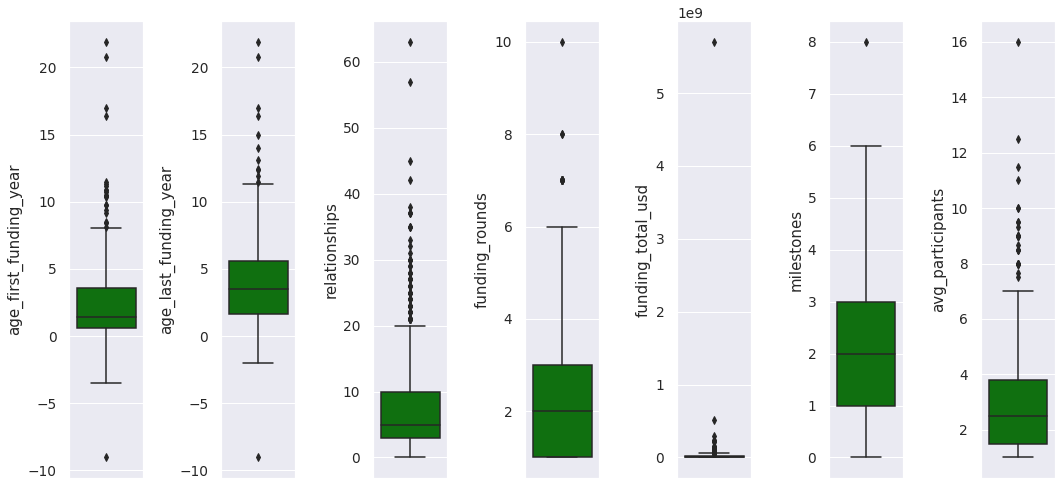

In [37]:
featuresNum = ['age_first_funding_year','age_last_funding_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

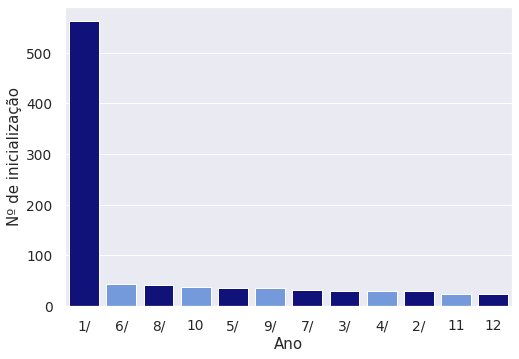

In [38]:
cdf = df["founded_at"].apply(lambda x: '' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "founded_at": "No_of_startup"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_startup", data=cdf, 
                palette=sns.color_palette(['#00008B', '#6495ED'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Ano", ylabel="Nº de inicialização")

In [39]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:3/     30
20:4/     30
20:2/     29
20:11     23
20:12     23
Name: founded_at, dtype: int64

In [40]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:3/    0.032503
20:4/    0.032503
20:2/    0.031419
20:11    0.024919
20:12    0.024919
Name: founded_at, dtype: float64

In [41]:
df["closed_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:31    0.637053
20:1/    0.069339
20:6/    0.041170
20:7/    0.037920
20:2/    0.035753
20:5/    0.033586
20:8/    0.027086
20:10    0.020585
20:3/    0.020585
20:11    0.020585
20:4/    0.019502
20:12    0.018418
20:9/    0.018418
Name: closed_at, dtype: float64

In [42]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(597, 48)

In [43]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 48)

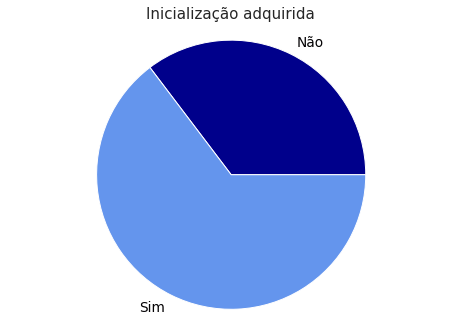

In [44]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['Não', 'Sim'], 
           colors=['#00008B', '#6495ED'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Inicialização adquirida')

In [45]:
coba = df[(df["status"] == 1)]

In [46]:
features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

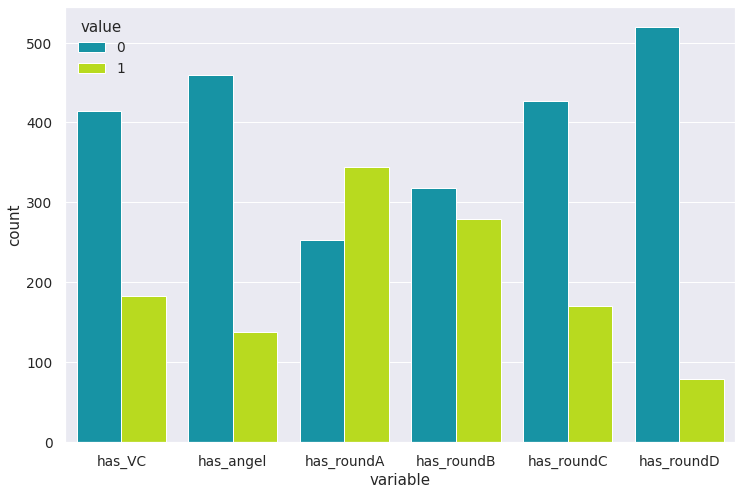

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

In [49]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
32,WA,42
29,TX,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


In [50]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
31,CA,web,55
72,MA,software,16
111,NY,web,15
144,WA,mobile,5
128,TX,enterprise,4
136,TX,web,4
51,IL,software,4
37,CO,software,4
44,GA,enterprise,2
138,VA,mobile,2


In [51]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
136,191,San Francisco,mobile,5
137,197,San Francisco,web,5
139,200,San Jose,hardware,5
143,215,Santa Clara,software,5
102,135,New York,games_video,5
140,208,San Mateo,web,4
107,150,Palo Alto,web,4
145,223,Seattle,web,3
86,103,Menlo Park,biotech,2
78,92,Los Angeles,games_video,2


In [52]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['Categoria', 'Total de Aberturas']
funding_sorted_category = funding_sorted_category.sort_values(['Total de Aberturas'], ascending = False)
funding_sorted_category.head(10)

,Categoria,Total de Aberturas
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


In [53]:
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['cidade', 'numero de aberturas']
funding_sorted_city = funding_sorted_city.sort_values(['numero de aberturas'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,cidade,numero de aberturas
91,Kirkland,5718914576
174,San Francisco,1673487129
135,New York,1231405734
125,Mountain View,985553322
181,Santa Clara,839050274
176,San Jose,733181780
13,Austin,706317317
173,San Diego,614475001
163,Redwood City,521330100
110,Loveland,510000000


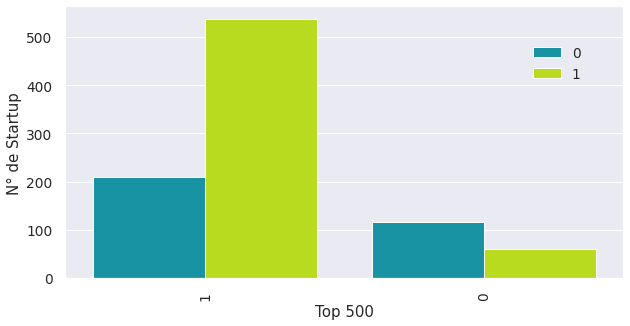

In [54]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Top 500", ylabel="N° de Startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [55]:
len(df[(df["status"] == True) & (df["is_top500"] == True)].index)

537

In [56]:
len(df[(df["status"] == False) & (df["is_top500"] == False)].index)

116

In [57]:
df_acquired["is_top500"].value_counts(normalize=True)

1    0.899497
0    0.100503
Name: is_top500, dtype: float64

In [58]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)

In [59]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [60]:
df_closed['age_closed_startup'].head()

4     792 days
5    2602 days
11   2161 days
12   3039 days
15   4104 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [61]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

In [62]:
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.00,1,0,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,2002-01-01,2009-02-15,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.00,1,0,2602 days,7.128767
11,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Menlo Park CA 94025,Center'd,0,2006-01-01,2011-12-02,2/1/2007,5/3/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:4829,1,1,1,0,0,0,1.75,1,0,2161 days,5.920548


In [63]:
(df_closed['age_closed_startup'].mean()) 

Timedelta('2184 days 17:13:37.177914112')

In [64]:
ratarata = round(2184 / 365) 
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


In [95]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [96]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)

In [65]:
import matplotlib.pyplot as plt

In [66]:
'geopandas' in sys.modules

True

In [67]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [68]:
print(gdf.head())

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego      San Diego CA 92101        Bandsintown       1   
1      Los Gatos      Los Gatos CA 95032          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at   closed_at first_funding_at last_funding_at  \
0   1/1/2007  31/12/2013         4/1/2009        1/1/2010   
1   1/1/2000  31/12/2013        2/14

In [69]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

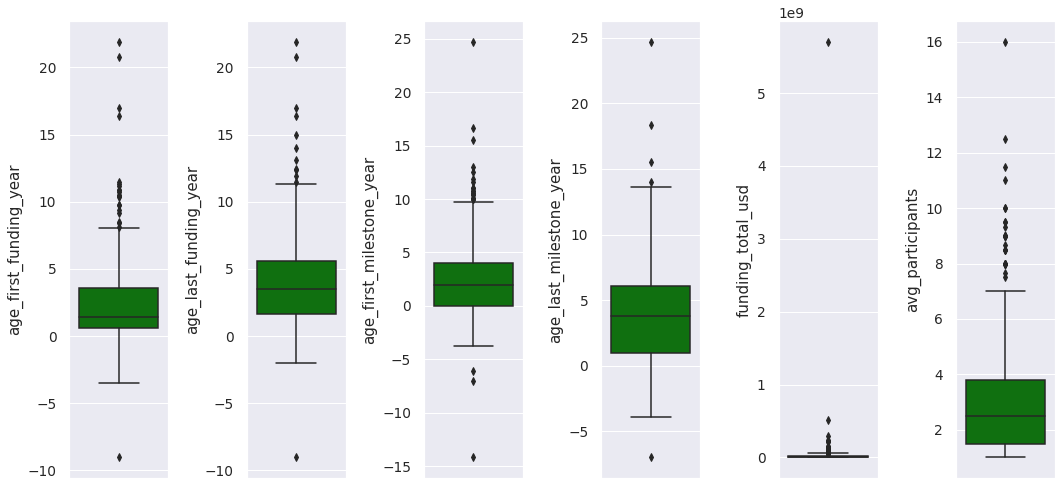

In [70]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [71]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [72]:
drop_outliers(df, 'funding_total_usd')

In [73]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [74]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [75]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


In [76]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0


In [77]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1


In [78]:
len(df[(df["has_RoundABCD"] == 1)].index)

577

In [79]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

410

In [80]:
len(df)

775

In [81]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1


In [82]:
df['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
12      True
13     False
14     False
15      True
16     False
18     False
19     False
20     False
21     False
22     False
24     False
25     False
26     False
27     False
29      True
30     False
31     False
33      True
34      True
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70     False
72      True
73     False
74     False
75     False
76      True
77     False
78     False
81     False
83     False
84     False
85     False
86     False

In [83]:
len(df[(df["has_Seed"] == 1)].index)

174

In [84]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1,0


In [85]:
len(df[(df["invalid_startup"] == 1)].index)

24

In [86]:
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)

In [87]:
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [88]:
df['age_closed_startup'].head()

0   2556 days
1   5113 days
2   1749 days
3   4382 days
4    792 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [89]:
df['startUp_age_year'] = df['age_closed_startup'].dt.days /365

In [90]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,startUp_age_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,2007-01-01,2013-12-31,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1,0,2556 days,7.002740
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,2000-01-01,2013-12-31,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0,0,5113 days,14.008219
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,2013-12-31,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0,0,1749 days,4.791781
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,2013-12-31,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0,0,4382 days,12.005479
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1,0,792 days,2.169863


In [91]:
df = df.drop(['state_code','id','Unnamed: 6','category_code','object_id'],axis=1)
df = df.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['geometry'],axis=1)

df = df.drop(['age_closed_startup'],axis=1)

In [92]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

In [93]:
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [94]:
X = df.drop('status', axis = 1) 
y = df['status'] 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)


Shape of the X Train : (620, 37)
Shape of the y Train : (620,)
Shape of the X test : (155, 37)
Shape of the y test : (155,)


# LGBM e Acuracia 

In [97]:
gbm = lgb.LGBMRegressor()
gbm.fit(X_train,y_train)
gbm.booster_.feature_importance()
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
1,age_first_funding_year,146
0,labels,100
2,age_last_funding_year,4
4,age_last_milestone_year,1


In [98]:
rfe = RFE(gbm, 10)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)

fea_rank_ = pd.DataFrame({'cols':X.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

TypeError: __init__() takes 2 positional arguments but 3 were given

Training Accuracy : 1.0
Testing Accuracy : 1.0


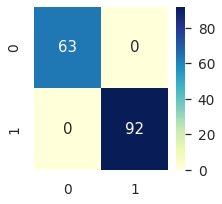

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        92

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [99]:
clf = LGBMClassifier(learning_rate=0.02,
                    boosting_type='gbdt', max_depth=4,  objective='binary', 
                    random_state=100,  
                  n_estimators=1000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)


clf.fit(X_train,y_train)

y_pred_lgb = clf.predict(X_test)


print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

Precisão do treinamento : 1.0
Precisão do teste : 1.0


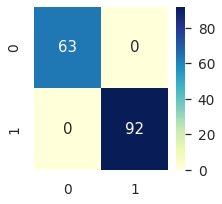

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        92

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [100]:

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_predicted_xgb = xgb.predict(X_test)

print("Precisão do treinamento :", xgb.score(X_train, y_train))
print("Precisão do teste :", xgb.score(X_test, y_test))

cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

Precisão do treinamento: 1.0
Precisão do teste: 1.0


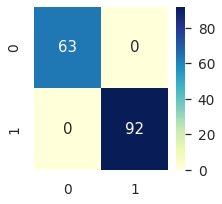

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        92

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [102]:
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)
gbc.fit(X_train,y_train)
y_predicted_gb = gbc.predict(X_test)

print("Precisão do treinamento:", gbc.score(X_train, y_train))
print("Precisão do teste:", gbc.score(X_test, y_test))

cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

In [103]:
0.922681496797328

0.922681496797328

Precisão do treinamento 1.0
Precisão do teste 1.0


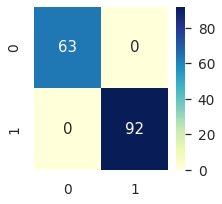

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        92

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

roc_auc 1.0
ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [104]:
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)


y_predicted_ab = ada.predict(X_test)

print("Precisão do treinamento", ada.score(X_train, y_train))
print("Precisão do teste", ada.score(X_test, y_test))


cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

Precisão do treinamento 0.6548387096774193
Precisão do teste 0.5935483870967742


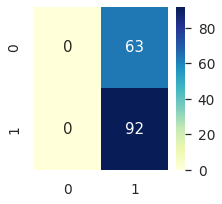

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.59      1.00      0.74        92

    accuracy                           0.59       155
   macro avg       0.30      0.50      0.37       155
weighted avg       0.35      0.59      0.44       155

ROC Curves              = 0.5
Precision-Recall Curves = 0.7967741935483871


In [105]:
sv = SVC()

sv.fit(X_train,y_train)


y_pred_sv = sv.predict(X_test)

print("Precisão do treinamento", sv.score(X_train, y_train))
print("Precisão do teste", sv.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_sv)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_sv)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_sv)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)
Precision_Recall_svc = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_svc)

Precisão do treinamento: 1.0
Precisão do teste 1.0


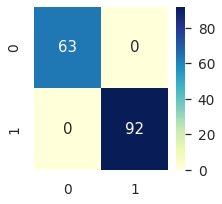

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        92

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [106]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Precisão do treinamento:", rf.score(X_train, y_train))
print("Precisão do teste", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

In [107]:
scores = {'LGBM':  { 
                             'precision_score': precision_score(y_test, y_pred_lgb),
                             'recall_score': recall_score(y_test, y_pred_lgb)
                         },        
                 'GradientBoosting Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'recall_score': recall_score(y_test, y_predicted_gb)
                         },
                 'Adaboost Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_ab),
                             'recall_score': recall_score(y_test, y_predicted_ab)
                         },
                 'SVC':  { 
                             'precision_score': precision_score(y_test, y_pred_sv),
                             'recall_score': recall_score(y_test, y_pred_sv)
                         },
                 'XGBoost':  { 
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'recall_score': recall_score(y_test, y_predicted_xgb)
                         },
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'recall_score': recall_score(y_test, y_pred_rf)
                         }
            }

In [108]:
Precision_Recall = {'LGBM':  { 
                             'Precision_Recall': Precision_Recall_lgbm
                         },        
                 'GradientBoosting Classifier':  { 
                             'Precision_Recall': Precision_Recall_gbs
                         },
                 'Adaboost Classifier':  { 
                             'Precision_Recall': Precision_Recall_abs
                         },
                 'SVC':  { 
                             'Precision_Recall': Precision_Recall_svc
                         },
                 'XGBoost':  { 
                             'Precision_Recall': Precision_Recall_xgb
                         },
                 'Random Forest':  { 
                             'Precision_Recall': Precision_Recall_rfs
                         }
            }

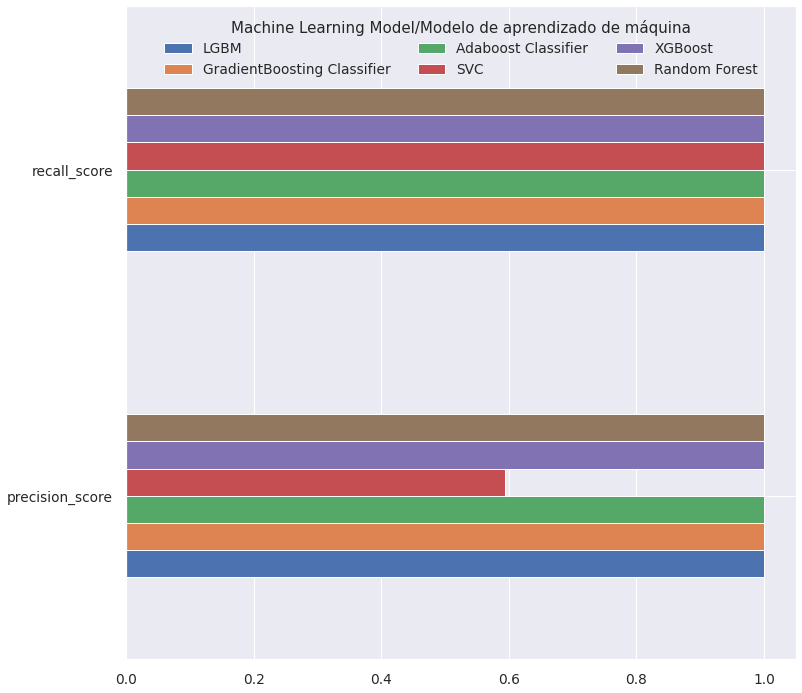

In [109]:
scores = pd.DataFrame(scores)
scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model/Modelo de aprendizado de máquina")

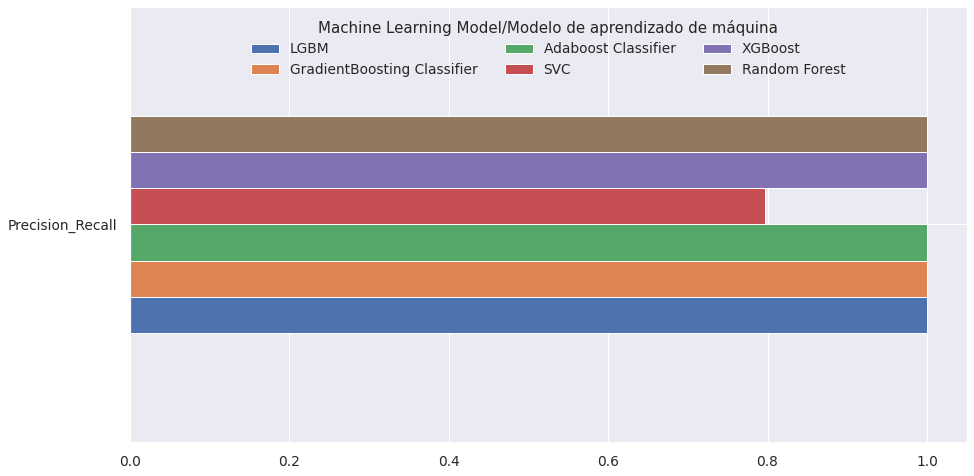

In [110]:
Precision_Recall = pd.DataFrame(Precision_Recall)

Precision_Recall.plot(kind="barh",figsize=(15, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model/Modelo de aprendizado de máquina")